In [51]:
from sklearn.datasets import load_digits
import time
start = time.time()
digits = load_digits()

In [52]:
%matplotlib inline
from matplotlib import pyplot as plt

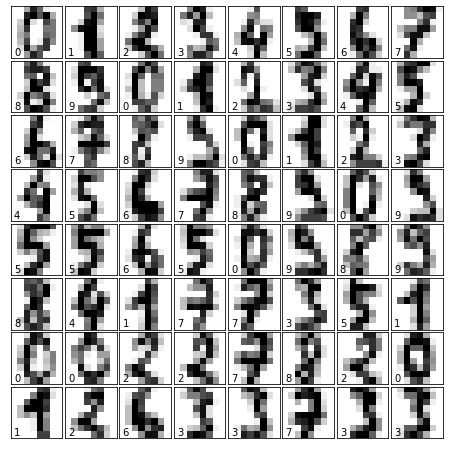

In [53]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver="randomized")
proj = pca.fit_transform(digits.data)

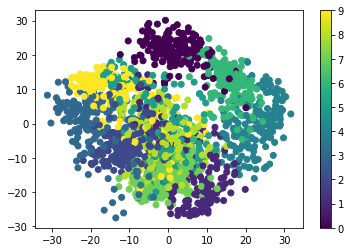

In [55]:
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar();

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [58]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
t1_start = time.time()
clf = GaussianNB()
clf.fit(X_train, y_train)
t1_end = time.time()
print ("Training time = ", t1_end-t1_start)
# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

Training time =  0.001998424530029297


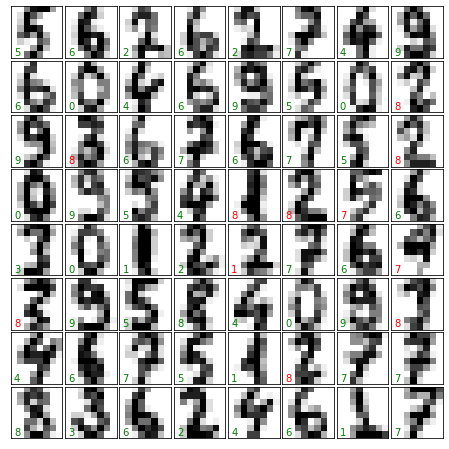

In [59]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [60]:
matches = (predicted == expected)
print(matches.sum())
print(len(matches))

365
450


In [61]:
matches.sum() / float(len(matches))

0.8111111111111111

In [62]:
from sklearn import metrics
from pandas import DataFrame
DataFrame(metrics.classification_report(expected, predicted, output_dict=True)).T

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,44.000000
1,0.857143,0.600000,0.705882,40.000000
2,0.964286,0.551020,0.701299,49.000000
3,0.906250,0.690476,0.783784,42.000000
4,1.000000,0.846154,0.916667,39.000000
5,0.928571,0.847826,0.886364,46.000000
6,0.909091,0.961538,0.934579,52.000000
7,0.737705,1.000000,0.849057,45.000000
8,0.480392,0.924528,0.632258,53.000000
9,1.000000,0.625000,0.769231,40.000000


In [63]:
DataFrame(metrics.confusion_matrix(expected, predicted))
d_end = time.time()
print ("first part execution time = ", d_end-start)

first part execution time =  31.6182701587677


In [64]:
%pylab inline
# Fetch the MNIST handwritten digit dataset
from sklearn.datasets import fetch_openml, load_digits
m_start = time.time()
mnist = fetch_openml("mnist_784") #load_digits()

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [65]:
# Display the number of samples 
print ("(Number of samples, No. of pixels) = ", mnist.data.shape)

(Number of samples, No. of pixels) =  (70000, 784)


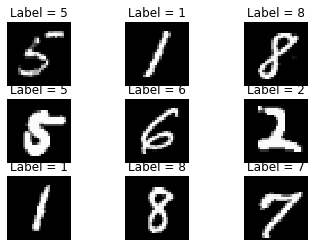

In [66]:
# Display 9 number randomly selectly
for c in range(1, 10):
    subplot(3, 3,c)
    i = randint(mnist.data.shape[0])
    im = mnist.data[i].reshape((28,28))
    axis("off")
    title("Label = {}".format(mnist.target[i]))
    imshow(im, cmap='gray')

In [67]:
# Split the data into training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.05, random_state=42)

# Which is same as 
# x_train = mnist.data[:split]
# y_train = mnist.target[:split]
# x_test = mnist.data[split:]
# y_test = mnist.target[split:]

In [68]:
# Create the Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [69]:
# Perform the predictions
t2_start = time.time()
clf.fit(x_train,y_train)
t2_end = time.time()
print ("Training time = ",t2_end-t2_start)

# Perform the predictions
y_predicted = clf.predict(x_test)
# Calculate the accuracy of the prediction
from sklearn.metrics import accuracy_score
print ("Accuracy = {} %".format(accuracy_score(y_test, y_predicted)*100))
# Cross validate the scores
from sklearn.metrics import classification_report
print ("Classification Report \n {}".format(classification_report(y_test, y_predicted, labels=range(0,10))))
m_end = time.time()
end = time.time()
print ("second part time = ", end-m_start, "\ntotal runtime = ", end-start)

Training time =  0.31290125846862793
Accuracy = 82.71428571428572 %
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       346
           1       0.85      0.93      0.89       378
           2       0.86      0.83      0.84       332
           3       0.82      0.81      0.81       400
           4       0.82      0.72      0.77       295
           5       0.87      0.71      0.78       335
           6       0.87      0.90      0.89       351
           7       0.95      0.80      0.87       362
           8       0.66      0.78      0.71       348
           9       0.71      0.84      0.77       353

   micro avg       0.83      0.83      0.83      3500
   macro avg       0.83      0.82      0.83      3500
weighted avg       0.83      0.83      0.83      3500

second part time =  38.73597598075867 
total runtime =  77.05626153945923


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
